## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

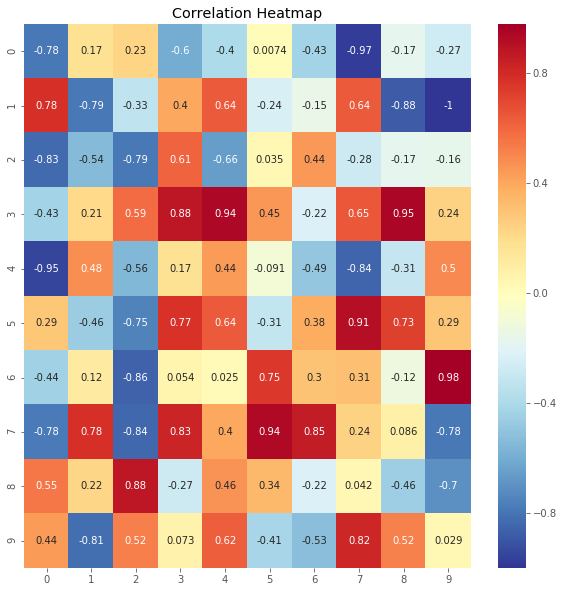

In [2]:
#產生0到1的亂數陣列，需要映射於-1到1之間
a = -1
b = 1

matrix = (b - a)*np.random.random_sample((10, 10)) + a 
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r,annot = True)
plt.title('Correlation Heatmap')
plt.show()

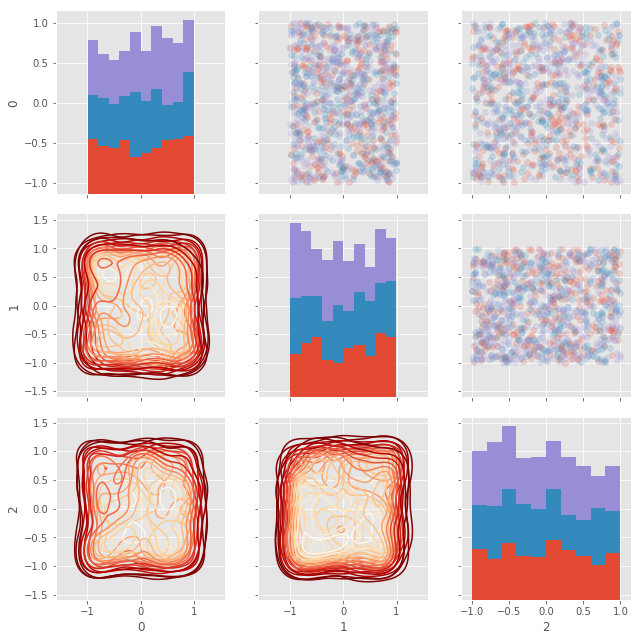

In [3]:
a = -1
b = 1

nrow = 1000
ncol = 3

matrix = (b - a)*np.random.random_sample((nrow, ncol)) + a 

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

# 上半部放 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 hist
grid.map_diag(plt.hist)
#grid.map_diag(sns.kdeplot )

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

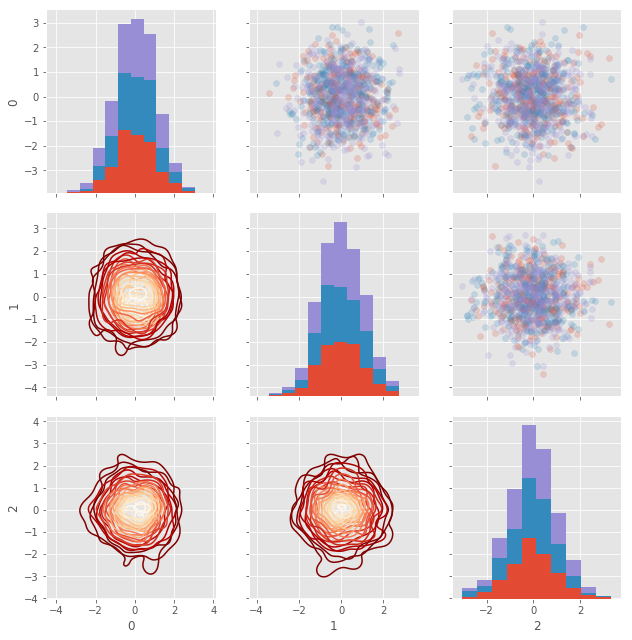

In [4]:
nrow = 1000
ncol = 3

matrix = np.random.randn(nrow, ncol)

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

# 上半部放 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 hist
grid.map_diag(plt.hist)
#grid.map_diag(sns.kdeplot )

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()